In [1]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from datetime import datetime
import time
BTCrawdata = requests.get('https://production.api.coindesk.com/v2/price/values/BTC?start_date=2020-01-01T00:00&end_date=2021-01-04T12:00&ohlc=false').json()
ETHrawdata = requests.get('https://production.api.coindesk.com/v2/price/values/ETH?start_date=2020-01-01T00:00&end_date=2021-01-04T12:00&ohlc=false').json()
BTCrawdata['data']

{'iso': 'BTC',
 'name': 'Bitcoin',
 'slug': 'bitcoin',
 'interval': '1-day',
 'entries': [[1577923199000, 7174.7440119511],
  [1578009599000, 6955.4875796712],
  [1578095999000, 7291.2195053189],
  [1578182399000, 7337.6366701377],
  [1578268799000, 7347.4332644392],
  [1578355199000, 7713.8607536496],
  [1578441599000, 8039.6037008183],
  [1578527999000, 8067.6063690564],
  [1578614399000, 7808.7013638165],
  [1578700799000, 8087.4528852359],
  [1578787199000, 8078.9935319903],
  [1578873599000, 8149.3137171468],
  [1578959999000, 8116.9610079465],
  [1579046399000, 8735.1424391365],
  [1579132799000, 8843.6757322237],
  [1579219199000, 8711.6375778988],
  [1579305599000, 8925.2990284456],
  [1579391999000, 8939.8643002492],
  [1579478399000, 8638.1814404614],
  [1579564799000, 8652.6837629859],
  [1579651199000, 8708.786013433],
  [1579737599000, 8635.0743569587],
  [1579823999000, 8384.0887767671],
  [1579910399000, 8451.2322960209],
  [1579996799000, 8347.567505406],
  [15800831990

In [2]:
BTCdf = pd.DataFrame(BTCrawdata['data']['entries'], columns=['Time','BTC Closing Price ($)'])
BTCdf.shape
btcopen_prices = [BTCdf.iloc[0,1]] + BTCdf.iloc[0:369,1].tolist()
BTCdf['BTC Opening Price ($)'] = btcopen_prices
BTCdf['BTC Opening Price ($)'] = round(BTCdf['BTC Opening Price ($)'], 2)
BTCdf['BTC Closing Price ($)'] = round(BTCdf['BTC Closing Price ($)'], 2)
BTCdf = BTCdf.drop(labels=0, axis=0)
BTCdf.head()

,Time,BTC Closing Price ($),BTC Opening Price ($)
1,1578009599000,6955.49,7174.74
2,1578095999000,7291.22,6955.49
3,1578182399000,7337.64,7291.22
4,1578268799000,7347.43,7337.64
5,1578355199000,7713.86,7347.43


In [3]:
ETHdf = pd.DataFrame(ETHrawdata['data']['entries'], columns=['Time','ETH Closing Price ($)'])
ethopen_prices = [ETHdf.iloc[0,1]] + ETHdf.iloc[0:369,1].tolist()
ETHdf['ETH Opening Price ($)'] = ethopen_prices
ETHdf['ETH Opening Price ($)'] = round(ETHdf['ETH Opening Price ($)'], 2)
ETHdf['ETH Closing Price ($)'] = round(ETHdf['ETH Closing Price ($)'], 2)
ETHdf = ETHdf.drop(labels=0, axis=0)
ETHdf.head()

,Time,ETH Closing Price ($),ETH Opening Price ($)
1,1578009599000,127.06,129.89
2,1578095999000,132.97,127.06
3,1578182399000,133.82,132.97
4,1578268799000,134.83,133.82
5,1578355199000,143.13,134.83


In [4]:
jointdf = BTCdf.join(ETHdf.set_index('Time'), on='Time', how='inner')
jointdf.head()

,Time,BTC Closing Price ($),BTC Opening Price ($),ETH Closing Price ($),ETH Opening Price ($)
1,1578009599000,6955.49,7174.74,127.06,129.89
2,1578095999000,7291.22,6955.49,132.97,127.06
3,1578182399000,7337.64,7291.22,133.82,132.97
4,1578268799000,7347.43,7337.64,134.83,133.82
5,1578355199000,7713.86,7347.43,143.13,134.83


In [7]:
n_units_in_a_day = BTCdf.loc[2,'Time'] - BTCdf.loc[1,'Time']
n_units_in_a_sec = n_units_in_a_day/24/60/60
print(n_units_in_a_sec)
BTCdf['Time'] = BTCdf['Time']/n_units_in_a_sec
BTCdf['Time'].head()

1000.0


1    1.578010e+09
2    1.578096e+09
3    1.578182e+09
4    1.578269e+09
5    1.578355e+09
Name: Time, dtype: float64

In [13]:
a = int(BTCdf.loc[1,'Time'])
c = datetime.utcfromtimestamp(a).strftime('%Y/%m/%d %H:%M:%S')
e = datetime.strptime(c,"%Y/%m/%d %H:%M:%S")
d = '2020/01/02 00:00:00'
b = datetime.strptime(d,"%Y/%m/%d %H:%M:%S")
timedelta = b-e
add = timedelta.total_seconds()

In [14]:
BTCdf['Time'] = BTCdf['Time'] + add
ETHdf['Time'] = ETHdf['Time']/n_units_in_a_sec + add
jointdf['Time'] = jointdf['Time']/n_units_in_a_sec + add
datetime.utcfromtimestamp(BTCdf['Time'][1]).strftime('%Y/%m/%d %H:%M:%S')
datetime.utcfromtimestamp(ETHdf['Time'][1]).strftime('%Y/%m/%d %H:%M:%S')
datetime.utcfromtimestamp(jointdf['Time'][1]).strftime('%Y/%m/%d %H:%M:%S')

'1970/01/02 00:24:50'

In [15]:
time = []
for i in range(1,370):
    time_i = datetime.utcfromtimestamp(BTCdf.loc[i,'Time']).strftime('%Y/%m/%d %H:%M:%S')
    time.append(time_i)
BTCdf['Date Time'] = time
ETHdf['Date Time'] = time
jointdf['Date Time'] = time
BTCdf.head()

,Time,BTC Closing Price ($),BTC Opening Price ($),Date Time
1,1.577923e+09,6955.49,7174.74,2020/01/02 00:00:00
2,1.578010e+09,7291.22,6955.49,2020/01/03 00:00:00
3,1.578096e+09,7337.64,7291.22,2020/01/04 00:00:00
4,1.578182e+09,7347.43,7337.64,2020/01/05 00:00:00
5,1.578269e+09,7713.86,7347.43,2020/01/06 00:00:00


In [19]:
BTCdf.drop(['Time'], axis=1)
set_BTC_dates = BTCdf.reset_index()
set_BTC_dates = set_BTC_dates[['Date Time','BTC Opening Price ($)', 'BTC Closing Price ($)']]
set_BTC_dates.head()

ETHdf.drop(['Time'], axis=1)
set_ETH_dates = ETHdf.reset_index()
set_ETH_dates = set_ETH_dates[['Date Time','ETH Opening Price ($)', 'ETH Closing Price ($)']]
set_ETH_dates.head()

jointdf.drop(['Time'], axis=1)
set_joint_dates = jointdf.reset_index()
set_joint_dates = set_joint_dates[['Date Time','BTC Opening Price ($)', 'BTC Closing Price ($)','ETH Opening Price ($)', 'ETH Closing Price ($)']]
set_joint_dates.head()

,Date Time,BTC Opening Price ($),BTC Closing Price ($),ETH Opening Price ($),ETH Closing Price ($)
0,2020/01/02 00:00:00,7174.74,6955.49,129.89,127.06
1,2020/01/03 00:00:00,6955.49,7291.22,127.06,132.97
2,2020/01/04 00:00:00,7291.22,7337.64,132.97,133.82
3,2020/01/05 00:00:00,7337.64,7347.43,133.82,134.83
4,2020/01/06 00:00:00,7347.43,7713.86,134.83,143.13


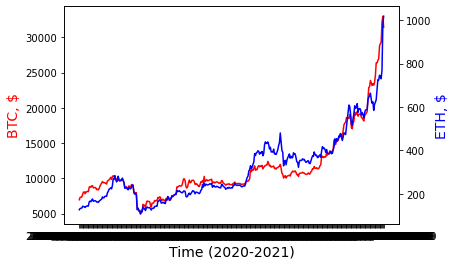

In [20]:
fig,ax = plt.subplots()
ax.plot(set_joint_dates['Date Time'], set_joint_dates['BTC Closing Price ($)'], color="red")
ax.set_xlabel("Time (2020-2021)",fontsize=14)
ax.set_ylabel("BTC, $",color="red",fontsize=14)

ax2=ax.twinx()
ax2.plot(set_joint_dates['Date Time'], set_joint_dates['ETH Closing Price ($)'], color="blue")
ax2.set_ylabel("ETH, $",color="blue",fontsize=14)
plt.show()